[2025-07-04 Fiddler](https://thefiddler.substack.com/p/happy-100th-fiddler)
====================

Fiddler
-------
The game seems similar to tic-tac-toe.

![20250704.png](20250704.png)

Let the side length of the smallest possible triangle be 1.

For each hole, count the number of triangles for which it is the left-most vertex, and, in
the cases where there are two left-most vertices, the triangles for which it is also the
uppermost.

For the second vertex, choose the uppermost one.

|first vertex row and column|second vertex row|side lengths|count|
|---------------------------|-----------------|------------|-----|
|1,1 | 1 | 1,2,3,4,5,6 | 6 |
|1,2 | 1 | 1,2,3,4,5 | 5 |
|    | 2 | $\sqrt3$, $\sqrt7$, $\sqrt{13}$, $\sqrt{21}$ | 4 |
|1,3 | 1 | 1,2,3,4 | 4 |
|    | 2 | $\sqrt3$, $\sqrt7$, $\sqrt{13}$ | 3 |
|    | 3 | $2\sqrt3$ | 1 |
|1,4 | 1 | 1,2,3 | 3 |
|    | 2 | $\sqrt3$, $\sqrt7$ | 2 |
|1,5 | 1 | 1,2 | 2 |
|    | 2 | $\sqrt3$ | 1 |
|1,6 | 1 | 1 | 1 |
|2,1 | 1 | 1, $\sqrt3$, $\sqrt7$, $\sqrt{13}$, $\sqrt{21}$ | 5 |
|    | 2 | 1,2,3,4,5 | 5 |
|2,2 | 1 | 1, $\sqrt3$, $\sqrt7$, $\sqrt{13}$ | 4 |
|    | 2 | 1,2,3,4 | 4 |
|    | 3 | $\sqrt3$, $\sqrt7$, $\sqrt{13}$ | 3 |
|2,3 | 1 | 1, $\sqrt3$, $\sqrt7$ | 3 |
|    | 2 | 1,2,3 | 3 |
|    | 3 | $\sqrt3$, $\sqrt7$ | 2 |
|2,4 | 1 | 1, $\sqrt3$ | 2 |
|    | 2 | 1,2 | 2 |
|    | 3 | $\sqrt3$ | 1 |
|2,5 | 1 | 1 | 1 |
|    | 2 | 1 | 1 |
|3,1 | 1 | 2, $\sqrt7$, $2\sqrt3$ | 3 |
|    | 2 | 1, $\sqrt3$, $\sqrt7$, $\sqrt{13}$ | 4 |
|    | 3 | 1,2,3,4 | 4 |
|3,2 | 1 | 2, $\sqrt7$ | 2 |
|    | 2 | 1, $\sqrt3$, $\sqrt7$ | 3 |
|    | 3 | 1,2,3 | 3 |
|    | 4 | $\sqrt3$, $\sqrt7$ | 2 |
|3,3 | 1 | 2 | 1 |
|    | 2 | 1, $\sqrt3$ | 2 |
|    | 3 | 1,2 | 2 |
|    | 1 | $\sqrt3$ | 1 |
|3,4 | 2 | 1 | 1 |
|    | 3 | 1 | 1 |
|4,1 | 1 | $\sqrt7$, 3 | 2 |
|    | 2 | 2, $\sqrt7$ | 2 |
|    | 3 | 1, $\sqrt3$, $\sqrt7$ | 3 |
|    | 4 | 1,2,3 | 3 |
|4,2 | 1 | $\sqrt7$ | 1 |
|    | 2 | 2 | 2 |
|    | 3 | 1, $\sqrt3$ | 2 |
|    | 4 | 1,2 | 2 |
|    | 5 | $\sqrt3$ | 1 |
|4,3 | 3 | 1 | 1 |
|    | 4 | 1 | 1 |
|5,1 | 2 | $\sqrt7$ | 1 |
|    | 3 | 2 | 1 |
|    | 4 | 1, $\sqrt3$ | 2 |
|    | 5 | 1,2 | 2 |
|5,2 | 4 | 1 | 1 |
|    | 5 | 1 | 1 |
|6,1 | 5 | 1 | 1 |
|    | 6 | 1 | 1 |

    6   9   8   5   3   1   0
     10  11   8   5   2   0
       11  10   6   2   0
         10   7   2   0
            6   2   0
              2   0
                0

Adding them up, there are 126 triangles.

In [1]:
def enumerate_triangles(holes):
    holes = set(holes)
    while True:
        if len(holes) < 3:
            break
        h = holes.pop()
        for h1 in holes:
            x, y = var('x,y')
            for s in solve([(x-h[0])^2 + (y-h[1])^2 == (h1[0]-h[0])^2 + (h1[1]-h[1])^2,
                            (x-h1[0])^2 + (y-h1[1])^2 == (h1[0]-h[0])^2 + (h1[1]-h[1])^2], [x,y]):
                h2 = (s[0].rhs(), s[1].rhs())
                if h2[0] < h1[0]:
                    continue
                elif h2[0] == h1[0] and h2[1] < h1[1]:
                    continue
                elif h2 in holes:
                    yield((h,h1,h2))

In [2]:
all_holes = ([(x,0) for x in [0..6]]
             + [(x+1/2,-sqrt(3)/2) for x in [0..5]]
             + [(x+1,-sqrt(3)) for x in [0..4]]
             + [(x+3/2,-3*sqrt(3)/2) for x in [0..3]]
             + [(x+2,-2*sqrt(3)) for x in [0..2]]
             + [(x+5/2,-5*sqrt(3)/2) for x in [0..1]]
             + [(3,-3*sqrt(3))])

In [3]:
len(set(enumerate_triangles(all_holes)))

126

In [4]:
if False:
    p = polygon([(-sqrt(3)/2,1/2),(sqrt(3)/2+6,1/2),(3,-3*sqrt(3)-1)],
                axes=false,color='#ccc')
    for h in all_holes:
        p += circle(h,0.3,fill=true,color='#444',alpha=0.2)
    n = 0
    with open('20250704.png', 'wb') as f:
        g = sage.plot.animate.APngAssembler(f,num_frames=127,delay=1,delay_denominator=5)
        for t in enumerate_triangles(all_holes):
            p += polygon(t,fill=false,color='blue',alpha=0.1)
            n += 1
            (p + text(f"{n}/126",(3,1)) + polygon(t,fill=false,color='red')).save(f"/tmp/{n}.png")
            g.add_frame(f"/tmp/{n}.png")
        (p + text("126/126",(3,1))).save("/tmp/127.png")
        g.add_frame("/tmp/127.png",delay=5) 

Extra credit
------------
It's not clear what the ratio between the vertical and horizontal spacings are, but
I don't think it matters.

Start with a set of all 50 stars.

For an arbitrary star in the set, consider each pair of every other star in the set
as adjacent vertices, excluding those for which the three stars would be on a line,
which should uniquely define the opposite vertex.  If there is a star at the opposite
vertex, that is another parallelogram.  Then remove that first star and iterate.

And the result is 5918 parallelograms.

In [5]:
def enumerate_parallelograms(stars):
    stars = set(stars)
    while True:
        if len(stars) < 4:
            break
        v = stars.pop()
        for v1 in stars:
            for v2 in stars:
                if v1[0] > v2[0]:
                    continue
                elif v1[0] == v2[0] and v1[1] >= v2[1]:
                    continue
                dx1 = v[0] - v1[0]
                dx2 = v[0] - v2[0]
                dy1 = v[1] - v1[1]
                dy2 = v[1] - v2[1]
                if dx1 == 0:
                    if dx2 == 0:
                        continue
                elif dy1 == 0:
                    if dy2 == 0:
                        continue
                elif dy2 != 0 and dx1/dy1 == dx2/dy2:
                    continue
                v3 = (v2[0]+v1[0]-v[0],v2[1]+v1[1]-v[1])
                if v3 in stars:
                    yield((v,v1,v3,v2))

In [6]:
all_stars = ([(x,y) for x in [0,2,4,6,8,10] for y in [0,2,4,6,8]]
             + [(x,y) for x in [1,3,5,7,9] for y in [1,3,5,7]])
len(list(enumerate_parallelograms(all_stars)))

5918

In [7]:
def star(point,r,r1,r2):
    (x,y) = point
    return polygon([(x+r1*sin(0),r*y+r1*cos(0)),
                    (x+r2*sin(pi/5),r*y+r2*cos(pi/5)),
                    (x+r1*sin(2*pi/5),r*y+r1*cos(2*pi/5)),
                    (x+r2*sin(3*pi/5),r*y+r2*cos(3*pi/5)),
                    (x+r1*sin(4*pi/5),r*y+r1*cos(4*pi/5)),
                    (x+r2*sin(5*pi/5),r*y+r2*cos(5*pi/5)),
                    (x+r1*sin(6*pi/5),r*y+r1*cos(6*pi/5)),
                    (x+r2*sin(7*pi/5),r*y+r2*cos(7*pi/5)),
                    (x+r1*sin(8*pi/5),r*y+r1*cos(8*pi/5)),
                    (x+r2*sin(9*pi/5),r*y+r2*cos(9*pi/5))],
                   color='white')

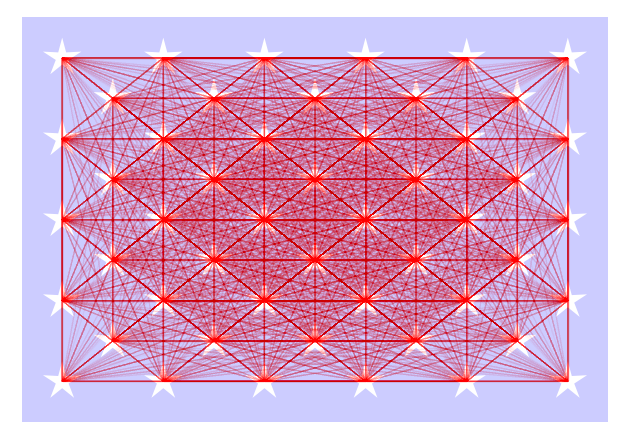

In [8]:
r = 0.8
p = polygon([(-r,-r),(10+r,-r),(10+r,9*r),(-r,9*r)],color='#ccf',axes=false)
for s in all_stars:
    p += star(s,r,r/2,r/6)
for pg in enumerate_parallelograms(all_stars):
    pg = [(pg[0][0],pg[0][1]*r),
          (pg[1][0],pg[1][1]*r),
          (pg[2][0],pg[2][1]*r),
          (pg[3][0],pg[3][1]*r)]
    p += polygon(pg,color='red',fill=false,alpha=0.01)
p